In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from matplotlib.patches import Arc, Circle
import networkx as nx
import community
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  from ipykernel import kernelapp as app
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  app.launch_new_instance()


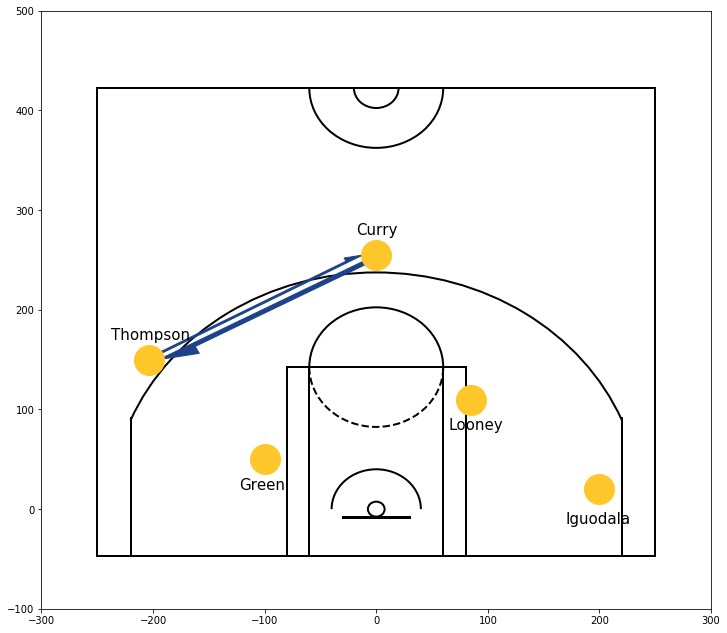

In [39]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.plot(0, 255, color = '#FFC72C', marker='o', markersize=30, label='Curry')
plt.plot(-204, 150, color = '#FFC72C', marker='o', markersize=30, label='Thompson')
plt.plot(-100, 50, color = '#FFC72C', marker='o', markersize=30, label='Green')
plt.plot(85, 110, color = '#FFC72C', marker='o', markersize=30, label='Looney')
plt.plot(200, 20, color = '#FFC72C', marker='o', markersize=30, label='Iguodala')
plt.annotate('Curry', (-18, 275), size=15, zorder=3)
plt.annotate('Thompson', (-238, 170), size=15, zorder=3)
plt.annotate('Green', (-123, 20), size=15, zorder=3)
plt.annotate('Looney', (65, 80), size = 15, zorder=3)
plt.annotate('Iguodala', (170, -15), size = 15, zorder=3)
plt.arrow(-204, 150, 192, 105, zorder=1, color = '#1D428A', width=3.6, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(0,255,-195,-105, zorder=1, color = '#1D428A', width=7.8, shape='right', length_includes_head=True, edgecolor='black')
plt.show()